In [221]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [222]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_set = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical'
)

Found 49107 images belonging to 10 classes.


In [223]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'data/test',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


CNN

In [224]:
cnn = tf.keras.models.Sequential()

Convolution

In [225]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

/Users/karen/PycharmProjects/CIFAR10/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pooling

In [226]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

2nd Convolutional Layer

In [227]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

3rd Convolutional Layer

In [228]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

In [229]:
# cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

Flattening

In [230]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [231]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))

Output Layer

In [232]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Training

In [233]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result = cnn.fit(x=train_set, validation_data=test_set, epochs=25)

Epoch 1/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.3152 - loss: 1.8129 - val_accuracy: 0.4706 - val_loss: 1.4377
Epoch 2/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4611 - loss: 1.4825 - val_accuracy: 0.5257 - val_loss: 1.2883
Epoch 3/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5127 - loss: 1.3593 - val_accuracy: 0.5909 - val_loss: 1.1458
Epoch 4/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5503 - loss: 1.2730 - val_accuracy: 0.6133 - val_loss: 1.0822
Epoch 5/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5736 - loss: 1.2009 - val_accuracy: 0.6371 - val_loss: 1.0285
Epoch 6/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5962 - loss: 1.1480 - val_accuracy: 0.6361 - val_loss: 1.0494
Epoch 7/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6143 - loss: 1.1021 - val_accuracy: 0.6338 - val_loss: 1.0760
Epoch 8/25
768/768 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6293 - loss: 1.0663 - 

In [234]:
print(result.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


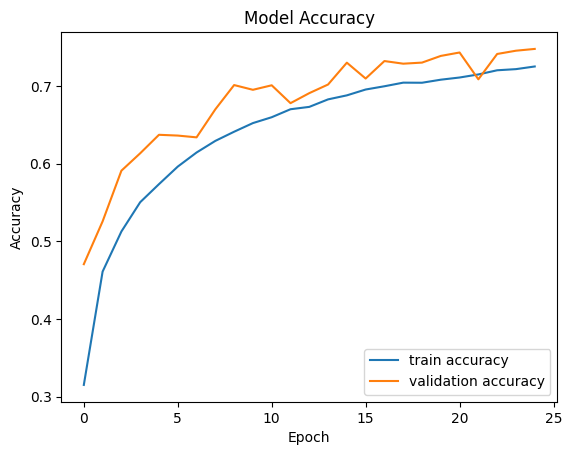

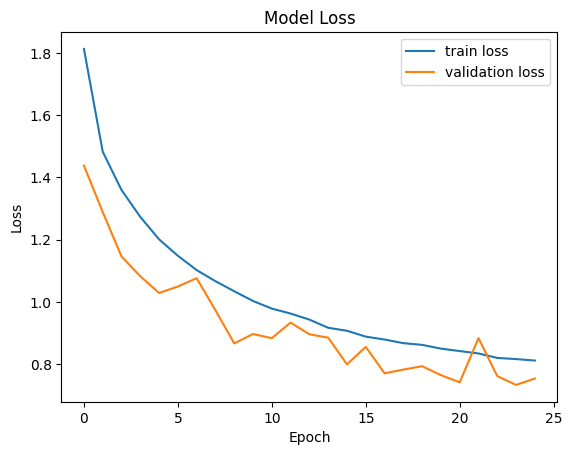

In [235]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

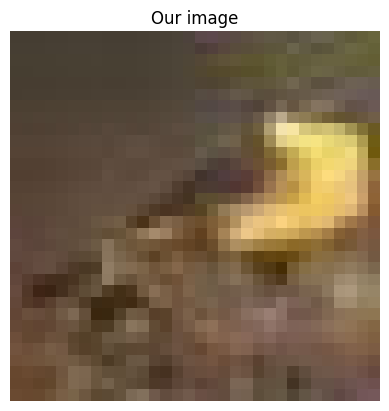

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class Index: 3
Predicted Class: Bird


In [260]:
ten_classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = image.load_img('data/pred/0434 (3).jpg', target_size=(32, 32))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

plt.imshow(test_image[0].astype('uint8'))
plt.title("Our image")
plt.axis('off')
plt.show()

test_image = test_image / 255.0

single_pred = cnn.predict(test_image)
single_pred_class = np.argmax(single_pred, axis=1)[0]
print("Predicted Class Index:", single_pred_class + 1)
predicted_class = ten_classes[single_pred_class]
print("Predicted Class:", predicted_class.capitalize())

In [276]:
import shutil
import os
import pandas as pd

folder = 'data/pred'
pred_destination = 'data/pred_grouped'

img_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.lower().endswith('.jpg')]

for class_name in ten_classes.values():
    folder_name = f"pred_{class_name}"
    os.makedirs(os.path.join(pred_destination, folder_name), exist_ok=True)

pred_classes = []
pred_indexes = []

for f in img_files:
    img_path = os.path.join(folder, f)
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred_index = np.argmax(cnn.predict(img_array), axis=1)[0]
    pred_indexes.append(pred_index + 1)
    pred_class = ten_classes[pred_index].capitalize()
    pred_classes.append(pred_class)

    dest_class_folder = os.path.join(pred_destination, f"pred_{pred_class}")
    dest_path = os.path.join(dest_class_folder, f)
    shutil.copy(img_path, dest_path)

df = pd.DataFrame({
    "Filename": img_files,
    "Predicted Class Index": pred_indexes,
    "Prediction Class": pred_classes
})


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [277]:
df.head(15)

,Filename,Predicted Class Index,Prediction Class
0,0250 (5).jpg,4,Cat
1,0071.jpg,9,Ship
2,0474 (3).jpg,3,Bird
3,0328 (5).jpg,8,Horse
4,0295 (10).jpg,10,Truck
5,0073 (2).jpg,2,Automobile
6,0240 (5).jpg,5,Deer
7,0294 (10).jpg,10,Truck
8,0063 (2).jpg,2,Automobile
9,0065.jpg,1,Airplane


In [278]:
print(df.groupby("Prediction Class").size())

Prediction Class
Airplane      506
Automobile    592
Bird          280
Cat           515
Deer          447
Dog           452
Frog          691
Horse         463
Ship          480
Truck         574
dtype: int64
